In [2]:
import os
import pathlib

import numpy as np
import tensorflow as tf
import soundfile as sf
from scipy.signal import butter, lfilter, freqz, filtfilt
import matplotlib.pyplot as plt

In [3]:
ORIGINAL_DATASET_PATH = "./dataset/mini_speech_commands"

PROCESSED_DATASET_PATH = "./processed_dataset"

IMAGES_PATH = "./images"

COMMANDS = ['yes', 'no', 'go', 'stop', 'left', 'right', 'up', 'down']

### Pre-process the signal

#### Remove noise from the wav file

In [4]:
# check if the processed dataset contains the commands
count = 0

for command in COMMANDS:
    if not os.path.isdir(f"{PROCESSED_DATASET_PATH}/{command}"):
        try:
            for command in COMMANDS:
                try:
                    count += 1
                    pathlib.Path(f"{PROCESSED_DATASET_PATH}/{command}").mkdir(parents=True, exist_ok=True)
                    print(f"Created directory {command}")
                except:
                    print("Error creating directories")
                    break
        except:
            print("Error creating directories")

if count == 0:
    print("All directories are created")

All directories are created


In [28]:
normal_boundary = 0.03

for command in COMMANDS:
    audio_path = ORIGINAL_DATASET_PATH + "/" + command
    for file in os.listdir(audio_path):
        if file.endswith(".wav"):
            audio_path_file = audio_path + "/" + file
            num_audio, sample_rate = sf.read(audio_path_file)
            filter_order = 1
            cutoff_frequency = 1000.0
            normalized_cutoff_frequency = 2 * cutoff_frequency / sample_rate
            b, a = butter(filter_order, normalized_cutoff_frequency, btype='low')
            # Apply the filter to the noisy audio data
            num_audio = filtfilt(b, a, num_audio)

            sf.write(f"{PROCESSED_DATASET_PATH}/{command}/{file}", num_audio, sample_rate)


Text(0.5, 1.0, 'Filtered audio')

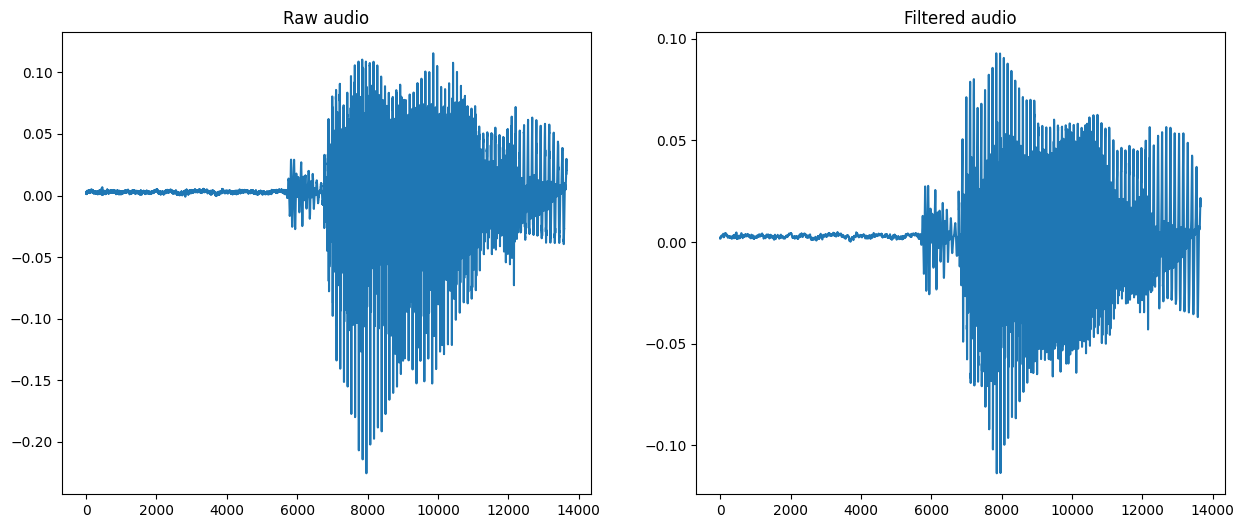

In [5]:
audio_path_2 = "./processed_dataset/down/0a9f9af7_nohash_0.wav"
audio_path_1 = "./dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav"

num_audio1, sample_rate = sf.read(audio_path_1)
num_audio2, sample_rate = sf.read(audio_path_2)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(num_audio1)
axs[0].set_title('Raw audio')

axs[1].plot(num_audio2)
axs[1].set_title('Filtered audio')

In [7]:
def get_spectrogram(waveform):
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

def plot_spectrogram(spectrogram, ax):
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)

Text(0.5, 1.0, 'Filtered audio')

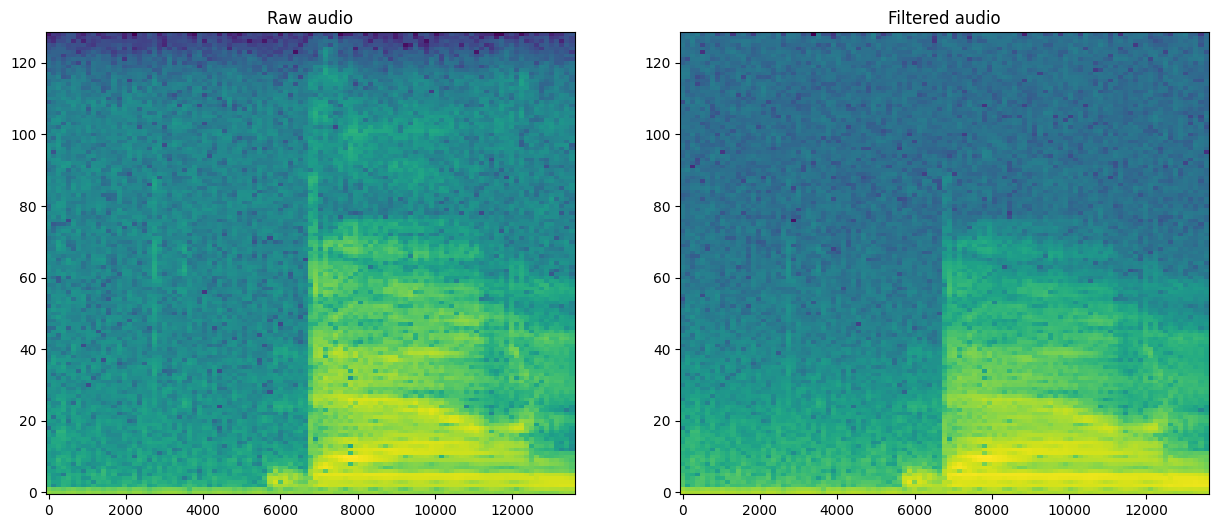

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

audio_path_1 = "./dataset/mini_speech_commands/down/0a9f9af7_nohash_0.wav"
audio_path_2 = "./processed_dataset/down/0a9f9af7_nohash_0.wav"

num_audio1, sample_rate = sf.read(audio_path_1)
spectrogram = get_spectrogram(num_audio1)
plot_spectrogram(np.squeeze(spectrogram.numpy()), axs[0])
axs[0].set_title('Raw audio')

num_audio2, sample_rate = sf.read(audio_path_2)
spectrogram = get_spectrogram(num_audio2)
plot_spectrogram(np.squeeze(spectrogram.numpy()), axs[1])
axs[1].set_title('Filtered audio')


In [27]:
for command in COMMANDS:
    audio_path = ORIGINAL_DATASET_PATH + "/" + command
    for file in os.listdir(audio_path):
        if file.endswith(".wav"):
            audio_path_file = audio_path + "/" + file
            num_audio, sample_rate = sf.read(audio_path_file)
            spectrogram = get_spectrogram(num_audio)
            spectrogram = np.squeeze(spectrogram.numpy())
            fig, ax = plt.subplots(figsize=(15, 6))
            plot_spectrogram(spectrogram, ax)
            ax.set_title(f"{command} spectrogram")
            save_path = f"./images/spectrogram/{command}/{file}.png"
            try:
                fig.savefig(save_path)
            except:
                pass
